In [9]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'hot'

In [10]:
sji = fits.open("/home/solararies/Project/Data/data_1/iris_l2_20220306_215937_3600105475_SJI_1400_t000.fits")
sji.info()

Filename: /home/solararies/Project/Data/data_1/iris_l2_20220306_215937_3600105475_SJI_1400_t000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     162   (776, 548, 64)   int16 (rescales to float32)   
  1                1 ImageHDU        38   (31, 64)   float64   
  2                1 TableHDU        33   64R x 5C   [A10, A10, A3, A66, A60]   


In [11]:
sji[0].data


array([[[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]],

       [[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]],

       [[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -20

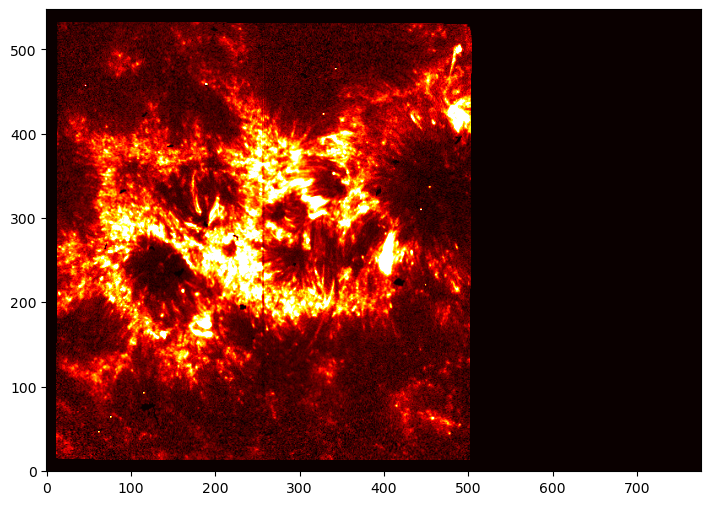

In [12]:
plt.imshow(sji[0].data[0], vmin=0, vmax=30)


In [85]:
sji.close()
sji = fits.open("/home/solararies/Project/Data/data_2/iris_l2_20220306_222300_3620257421_SJI_1400_t000.fits",memmap=True, do_not_scale_image_data=True)
                

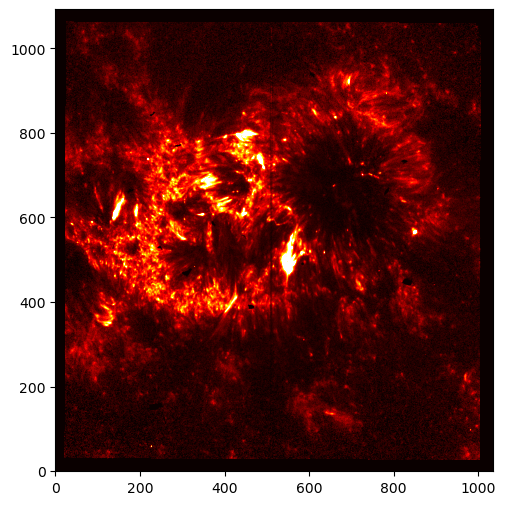

In [86]:
hd = sji[0].header
plt.imshow(sji[0].data[50] * hd['BSCALE'] + hd['BZERO'],vmin=0, vmax=30)
           

In [87]:
from astropy.wcs import WCS
wcs = WCS(hd)


  'seconds' -> 's'. [astropy.wcs.wcs]


In [88]:
wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'Time'  
CRVAL : -0.13149833333333333  -0.07016861111111111  2063.89  
CRPIX : 518.5  547.0  192.0  
PC1_1 PC1_2 PC1_3  : 0.999938428402  0.011277849786  0.0  
PC2_1 PC2_2 PC2_3  : -0.011277849786  0.999938428402  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.620833333333333e-05  4.620833333333333e-05  10.8053  
NAXIS : 1036  1093  384

We can see that the first two axes have type of ‘HPLN’ and ‘HPLT’, meaning helioprojective-cartesian longitude and latitude respectively, or solar X and Y. The last axis is time in seconds.

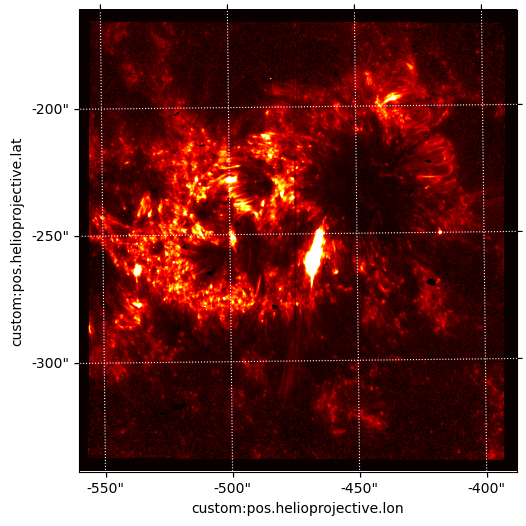

In [89]:
ax = plt.subplot(projection=wcs.dropaxis(-1))
ax.imshow(sji[0].data[200] * hd['BSCALE'] + hd['BZERO'],vmin=0, vmax=30)
ax.grid(color='w', ls=':')

You’ll notice that the solar coordinate grid is slightly tilted from the image axes. This is normal. With different IRIS roll angles, this difference will be even more obvious.

In [90]:
print(sji[1].data.shape)
#sji[1].header

(384, 31)


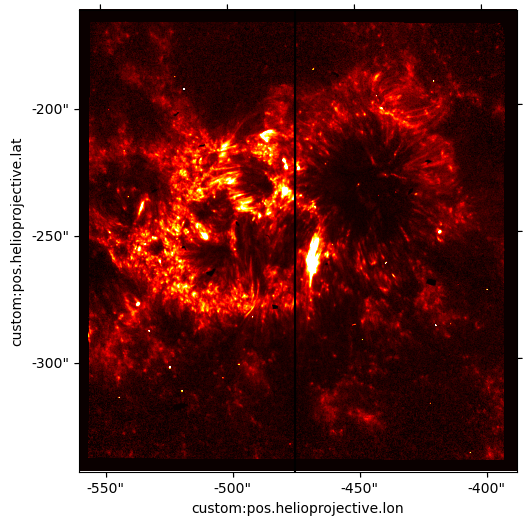

In [96]:
ax = plt.subplot(projection=wcs.dropaxis(-1))
timestep = 100
ax.imshow(sji[0].data[timestep] * hd['BSCALE'] + hd['BZERO'],vmin=0, vmax=30)
ax.axvline(x=sji[1].data[timestep, 4], color='black')